The following is the code from step 1 modified into a subroutine so we can easily change
the number of nx steps. 

In [3]:
#Remember: Comments in python are denoted by the pound sign 
import numpy                   # Load the numpy maxrix algebra library 
from matplotlib import pyplot  # Load the pyplot from the matplotlib librry
import time, sys               # Load the time and system utilities.

# The following code makes the matplotlib plots appear in the notebook instead of a separate window.
%matplotlib inline 

#make the code into a subroutine that takes the number of x axis grid points nx as input.
def linearconv(nx):
#define our initial grid parameters
    dx = 2 / (nx-1) # distance between grid lines
    nt = 25       #nt = number of time steps we want to calculate
    dt = .025    #dt = amount of time each time step covers (delta t)

    c = 1         #assume wavespeed of c=1.

#setup the initial conditions u = 1 from 0 to .5 then U= 2 from .5 to 1.0 then u = 1 from 1 -> 2
#note Boundary Conditions u = 1 at x = 0 and x = 2
    u = numpy.ones(nx)    #use the numpy library function ones to create our array
    u[int(.5/dx):int(1/dx + 1)] = 2 # setting u = 2 between x - .5 and 1 as per our initial conditions

    un = numpy.ones(nx) # initialize a temporary array

    for n in range(nt): #loop for values of n from 0 to nt, ie the outter loop will run nt times.
        un = u.copy()   ## copy the existing values of u into un.
        for i in range(2, nx-1): ## try commenting out this line 
            u[i] = un[i] - c*dt / dx*(un[i] - un[i-1])
                
    pyplot.plot(numpy.linspace(0, 2, nx), u); 

Now lets try various values of nx.

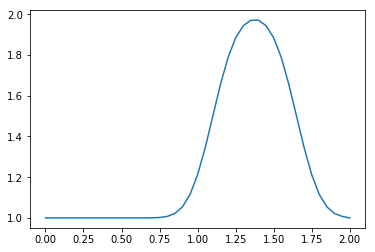

In [4]:
linearconv(41) #number of grid points

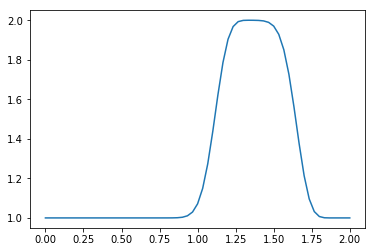

In [5]:
linearconv(61) #number of grid points

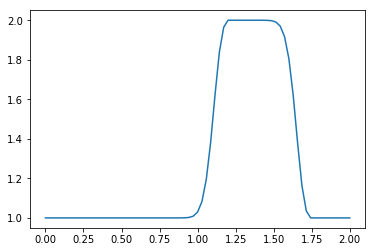

In [6]:
linearconv(71) #Number of grid points

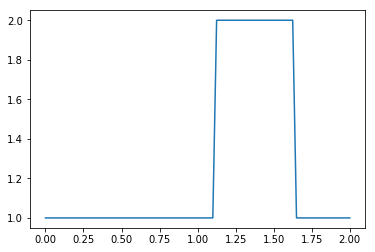

In [7]:
linearconv(81) #Number of grid points

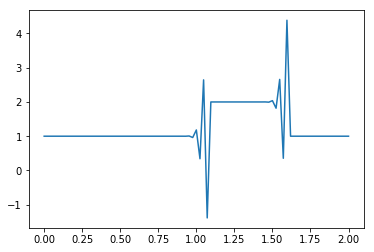

In [8]:
linearconv(85) #Number of grid points

This doesn't look anything like our original hat function.

<h1>What happened?</h1>
To answer that question, we have to think a little bit about what we're actually implementing in code.

In each iteration of our time loop, we use the existing data about our wave to estimate the speed of the wave in the subsequent time step. Initially, the increase in the number of grid points returned more accurate answers. There was less numerical diffusion and the square wave looked much more like a square wave than it did in our first example.

Each iteration of our time loop covers a time-step of length $\Delta t$, which we have been defining as 0.025

During this iteration, we evaluate the speed of the wave at each of the $x$ points we've created. In the last plot, something has clearly gone wrong.

What has happened is that over the time period $\Delta t$, the wave is travelling a distance which is greater than dx. The length dx of each grid box is related to the number of total points nx, so stability can be enforced if the $\Delta t$ step size is calculated with respect to the size of dx.

$$\sigma = \frac{u \Delta t}{\Delta x} \leq \sigma_{\max}$$
where $u$ is the speed of the wave; $\sigma$ is called the Courant number and the value of $\sigma_{\max}$ that will ensure stability depends on the discretization used.

In a new version of our code, we'll use the CFL number to calculate the appropriate time-step dt depending on the size of dx.

In [10]:
#Remember: Comments in python are denoted by the pound sign 
import numpy                   # Load the numpy maxrix algebra library 
from matplotlib import pyplot  # Load the pyplot from the matplotlib librry
import time, sys               # Load the time and system utilities.

# The following code makes the matplotlib plots appear in the notebook instead of a separate window.
%matplotlib inline 

#make the code into a subroutine that takes the number of x axis grid points nx as input.
def linearconv1(nx):
#define our initial grid parameters
    dx = 2 / (nx-1) # distance between grid lines
    nt = 25       #nt = number of time steps we want to calculate
    sigma = 0.5
    dt = sigma*dx    #dt = amount of time each time step covers (delta t)

    c = 1         #assume wavespeed of c=1.

#setup the initial conditions u = 1 from 0 to .5 then U= 2 from .5 to 1.0 then u = 1 from 1 -> 2
#note Boundary Conditions u = 1 at x = 0 and x = 2
    u = numpy.ones(nx)    #use the numpy library function ones to create our array
    u[int(.5/dx):int(1/dx + 1)] = 2 # setting u = 2 between x - .5 and 1 as per our initial conditions

    un = numpy.ones(nx) # initialize a temporary array

    for n in range(nt): #loop for values of n from 0 to nt, ie the outter loop will run nt times.
        un = u.copy()   ## copy the existing values of u into un.
        for i in range(2, nx-1): ## try commenting out this line 
            u[i] = un[i] - c*dt / dx*(un[i] - un[i-1])

    pyplot.plot(numpy.linspace(0, 2, nx), u); 

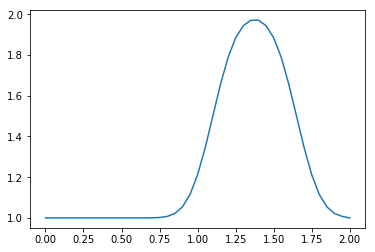

In [11]:
  linearconv1(41) #number of grid points

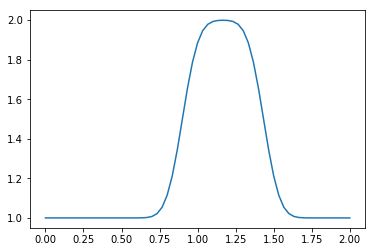

In [12]:
  linearconv1(61) #number of grid points

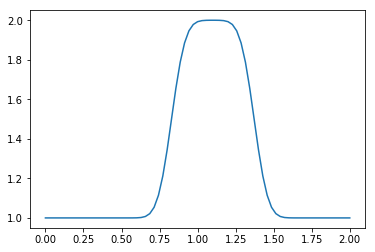

In [13]:
  linearconv1(71) #number of grid points

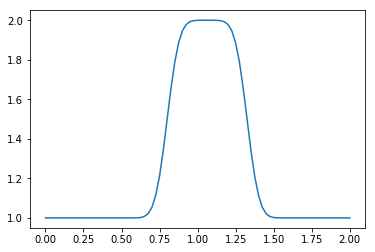

In [14]:
  linearconv1(81) #number of grid points

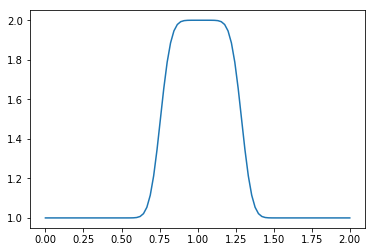

In [15]:
  linearconv1(91) #number of grid points

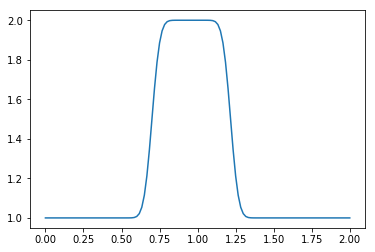

In [16]:
  linearconv1(121) #number of grid points